Preprocessing Image.
1. Locate directories.
2. Loop through main directory.
3. Loop through each class.
4. Get image path for each class.

In [18]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt

Reading CSV into a Dataframe

In [19]:
csv_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst-e_image_details.csv'
df = pd.read_csv(csv_path)
#Length Before data cleaning
print(f'Length before Data Cleaning: {len(df)}')

# Removing mp4 and dngs
df = df[~df["image_ID"].str.endswith((".mp4", ".dng"))]

#Length After data cleaning
print(f'Length after Data Cleaning: {len(df)}')

Length before Data Cleaning: 1546
Length after Data Cleaning: 1490


Testing on single image, resizing through keras

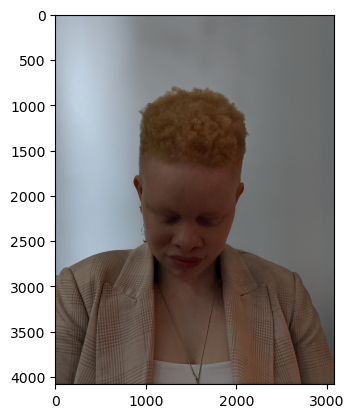

(3072, 4080)


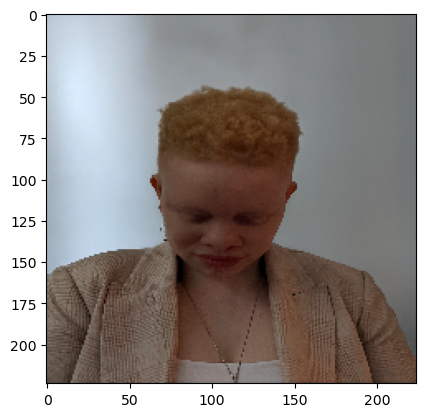

In [17]:
image_path = df['image_ID'] # 'image_ID' is the column name for image paths
folder_name = df['subject_name']  #  'subject_name' is the column name for folder names
label = df['MST']  # 'MST' is the column name for labels
main_dir = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data'
full_image_path = os.path.join(main_dir,folder_name.iloc[0], image_path.iloc[0])

# Read the image using PIL or OpenCV
# image = cv2.imread(full_image_path)
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

img = tf.keras.utils.load_img(full_image_path)
plt.imshow(img)
plt.show()
print(img.size)

image_array = tf.keras.preprocessing.image.img_to_array(img) #Image to array
new_img = tf.image.resize(image_array, (224, 224)) #Resizing to Array
resized_img = tf.keras.preprocessing.image.array_to_img(new_img) #Resized array back to image
plt.imshow(resized_img)

# plt.imshow(image)


Testing on entire dataset using opencv

In [32]:
images =[]
labels =[]

# Function to resize images and save to a destination folder
def resize_and_save(input_folder, output_folder, df, target_size=(224, 224)):
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    #Showing Progress bar
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Processing Images"):
        # Extract information from CSV
        folder_name = row['subject_name']
        image_name = row['image_ID']
        label = row['MST']

        # Build paths
        input_path = os.path.join(input_folder, folder_name, image_name)
        output_path = os.path.join(output_folder, f"{label}_{image_name}")

        #Check if image is loaded correctly
        img = cv2.imread(input_path)
        if img is None:
            print(f"Could not read the image at: {input_path}")
        else:
             # Read and resize the image
            img = cv2.imread(input_path)
            img = cv2.resize(img, target_size)

            images.append(img)
            labels.append(label)
            # Save the resized image to the output folder
            cv2.imwrite(output_path, img)
        #     continue  # Move to the next iteration or handle the issue accordingly

        # # Read and resize the image
        # img = cv2.imread(input_path)
        # img = cv2.resize(img, target_size)

        # images.append(img)
        # # Save the resized image to the output folder
        # cv2.imwrite(output_path, img)

if __name__ == "__main__":
    # Set paths
    input_folder = "E:\\University\\FYP Stuff\\Dataset\\mst-e_data"  # path of your dataset
    output_folder = "E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst_resized"   # desired output path
    csv_path = "E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\mst-e_image_details.csv"  # path of your CSV file

    # Resize and save images
    resize_and_save(input_folder, output_folder, df)

Processing Images:  89%|████████▊ | 1319/1490 [04:59<00:36,  4.69it/s]

Could not read the image at: E:\University\FYP Stuff\Dataset\mst-e_data\subject_2\bottom


Processing Images: 100%|██████████| 1490/1490 [05:38<00:00,  4.40it/s]


Appending Images from New Folder

1486
1


IndexError: list index out of range

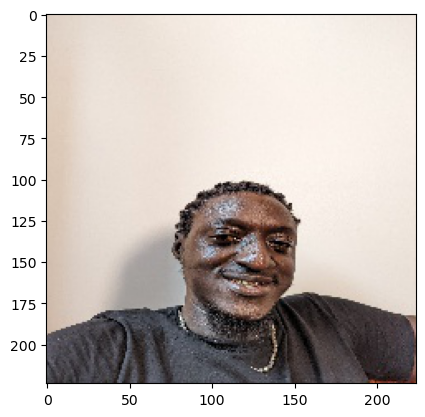

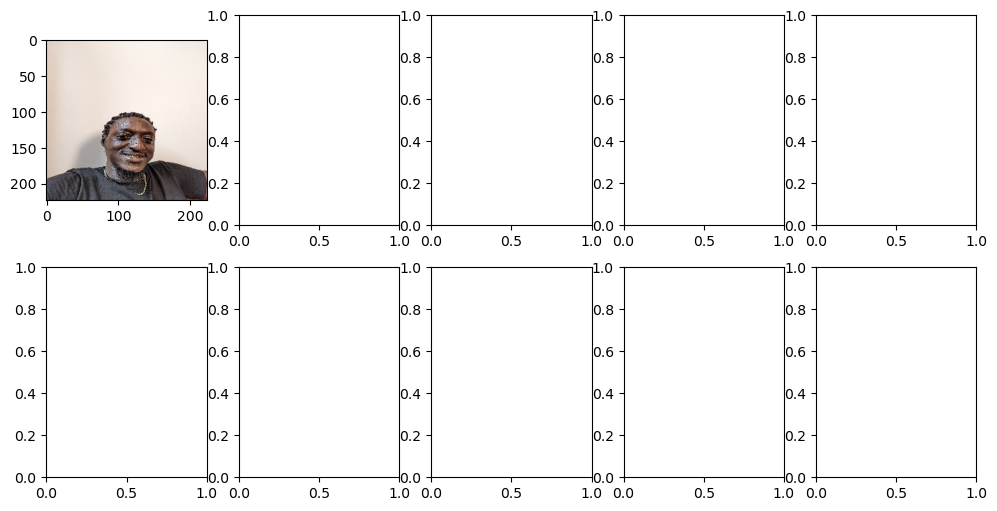

In [33]:
images = []
labels = []

for file in os.listdir(output_folder):

    #Get the path name of image
    img_path = os.path.join(output_folder, file)

    #Open image and append
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    # labels.append(label)
    
print(len(images))
# print(len(labels))
print(label[0])
plt.imshow(images[0])

# Assuming you have loaded image data and labels into 'data' and 'labels' variables
# For example, data = ... (your image data as NumPy array)
#              labels = ... (your corresponding labels as NumPy array)

# # Define a function to plot a specified number of images
def plot_images(images, labels, num_images=10, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    for i in range(min(num_images, rows * cols)):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]
        ax.imshow(images[i])
        ax.set_title(f"Label: {labels[i]}")
        ax.axis("off")
    plt.show()

# # Reshape the image data if it's flattened or not in the correct shape
# # For example, if your images are (num_samples, height * width * channels), reshape them to (num_samples, height, width, channels)
# # data = data.reshape(-1, height, width, channels)

# # Call the plot_images function for the first 10 images
plot_images(images[:10], labels[:10], num_images=10)

Delete Later


Resizing entire dataset using keras

In [12]:
data = []
labels = []

for index, row in df.iterrows():
    image_path = row['image_ID']  # Assuming 'image_path' is the column name for image paths
    folder_name = row['subject_name']  # Assuming 'folder_name' is the column name for folder names
    label = row['MST']  # Assuming 'label' is the column name for labels
    main_dir = 'D:\\NUST\\SEM 7\\Computer Vision\\Project\\mst-e_data\\mst-e_data'
    full_image_path = os.path.join(main_dir, folder_name, image_path)
    
    img = tf.keras.utils.load_img(full_image_path)
    image_array = tf.keras.preprocessing.image.img_to_array(img) #Image to array
    new_img = tf.image.resize(image_array, (256, 256)) #Resizing to Array
    resized_img = tf.keras.preprocessing.image.array_to_img(new_img) #Resized array back to image

    data.append(new_img)
    labels.append(label)

data = np.array(data)
labels = np.array(labels)
print((data).shape)
print(labels)


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\NUST\\SEM 7\\Computer Vision\\Project\\mst-e_data\\mst-e_data\\subject_18\\PXL_20220922_183640936.PORTRAIT.jpg'